## 导库，获取数据

In [1]:
from sklearn.linear_model import LogisticRegression as LR
import pandas as pd
import numpy as np
%matplotlib inline
# 其实日常在导库的时候，并不是一次性能够知道我们要用的所有库的。通常都是在建模过程中逐渐导入需要的库。

In [2]:
data = pd.read_csv('./data/rankingcard.csv', index_col=0)

## 探索数据与数据预处理

In [3]:
# 观察数据类型
data.head()  # 注意可以看到第一列为标签，剩下的10列为特征

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
# 观察数据结构
data.shape  # (150000, 11)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

### 去除重复值

In [5]:
# 去除重复值
data.drop_duplicates(inplace=True)  # inplace=True表示替换原数据

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [7]:
# 删除之后千万不要忘记，恢复索引
data.index = range(data.shape[0])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

### 填补缺失值

In [8]:
# 探索缺失值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [9]:
data.isnull().sum()/data.shape[0]  # 得到缺失值的比例
# data.isnull().mean()#上一行代码的另一种形式书写

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [10]:
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [11]:
data['NumberOfDependents'].fillna(int(data['NumberOfDependents'].mean()), inplace=True)
# 这里用均值填补家庭人数这一项
# 如果你选择的是删除那些缺失了2.5%的特征，千万记得恢复索引哟~
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

In [12]:
data.isnull().sum()/data.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [13]:
def fill_missing_rf(X, y, to_fill):
    """
    使用随机森林填补一个特征的缺失值的函数

    参数：
    X：要填补的特征矩阵
    y：完整的，没有缺失值的标签
    to_fill：字符串，要填补的那一列的名称
    """
    # 构建我们的新特征矩阵和新标签
    df = X.copy()
    fill = df.loc[:, to_fill]
    df = pd.concat(
        [df.loc[:, df.columns != to_fill], pd.DataFrame(y)], axis=1)

    # 找出我们的训练集和测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index, :]
    Xtest = df.iloc[Ytest.index, :]

    # 用随机森林回归来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100, n_jobs=-1)
    rfr = rfr.fit(Xtrain, Ytrain)
    Ypredict = rfr.predict(Xtest)
    return Ypredict

In [14]:
X = data.iloc[:, 1:]
y = data["SeriousDlqin2yrs"]  # y = data.iloc[:,0]
X.shape  # (149391, 10)

(149391, 10)

In [15]:
%%time
#=====[TIME WARNING:1 min]=====#
y_pred = fill_missing_rf(X, y, 'MonthlyIncome')

CPU times: user 48.7 s, sys: 1.04 s, total: 49.7 s
Wall time: 9.98 s


In [16]:
# 注意可以通过以下代码检验数据是否数量相同
y_pred.shape == data.loc[data.loc[:, 'MonthlyIncome'].isnull(), 'MonthlyIncome'].shape

True

In [17]:
# 确认我们的结果合理之后，我们就可以将数据覆盖了
data.loc[data.loc[:, 'MonthlyIncome'].isnull(), 'MonthlyIncome'] = y_pred
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

### 描述性统计处理异常值

In [18]:
# 描述性统计
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000,1.493910e+05,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000
mean,0.066999,6.071087,52.306237,0.393886,354.436740,5.424833e+03,8.480892,0.238120,1.022391,0.212503,0.740393
std,0.250021,250.263672,14.725962,3.852953,2041.843455,1.323839e+04,5.136515,3.826165,1.130196,3.810523,1.108272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030132,41.000000,0.000000,0.177441,1.800000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154235,52.000000,0.000000,0.368234,4.417000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.556494,63.000000,0.000000,0.875279,7.416000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [19]:
data.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5424.832559,13238.391336,0.0,0.0,0.180000,1800.000000,4417.000000,7416.000000,10800.000000,23200.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [20]:
# 异常值也被我们观察到，年龄的最小值居然有0，这不符合银行的业务需求，即便是儿童账户也要至少8岁，我们可以
# 查看一下年龄为0的人有多少
(data["age"] == 0).sum()

1

In [21]:
# 发现只有一个人年龄为0，可以判断这肯定是录入失误造成的，可以当成是缺失值来处理，直接删除掉这个样本
data = data[data["age"] != 0]

In [22]:
"""
另外，有三个指标看起来很奇怪：
 
"NumberOfTime30-59DaysPastDueNotWorse"
"NumberOfTime60-89DaysPastDueNotWorse"
"NumberOfTimes90DaysLate"
 
这三个指标分别是“过去两年内出现35-59天逾期但是没有发展的更坏的次数”，“过去两年内出现60-89天逾期但是没
有发展的更坏的次数”,“过去两年内出现90天逾期的次数”。这三个指标，在99%的分布的时候依然是2，最大值却是
98，看起来非常奇怪。一个人在过去两年内逾期35~59天98次，一年6个60天，两年内逾期98次这是怎么算出来的？
 
我们可以去咨询业务人员，请教他们这个逾期次数是如何计算的。如果这个指标是正常的，那这些两年内逾期了98次的
客户，应该都是坏客户。在我们无法询问他们情况下，我们查看一下有多少个样本存在这种异常：
 
"""
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90]
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [23]:
data.loc[:,"NumberOfTimes90DaysLate"].value_counts()

0     141107
1       5232
2       1555
3        667
4        291
98       220
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [24]:
# 有225个样本存在这样的情况，并且这些样本，我们观察一下，标签并不都是1，他们并不都是坏客户。因此，我们基
# 本可以判断，这些样本是某种异常，应该把它们删除。

data = data[data.loc[:, "NumberOfTimes90DaysLate"] < 90]
# 一定要恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

### 样本不均衡问题

In [25]:
# 探索标签的分布
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
y.value_counts()  # 查看每一类别值得数据量，查看样本是否均衡

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [26]:
n_sample = X.shape[0]
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(
    n_sample, n_1_sample/n_sample, n_0_sample/n_sample))
# 样本个数：149165; 1占6.62%; 0占93.38%

样本个数：149165; 1占6.62%; 0占93.38%


In [27]:
# 如果报错，就在prompt安装：pip install imblearn
import imblearn
# imblearn是专门用来处理不平衡数据集的库，在处理样本不均衡问题中性能高过sklearn很多
# imblearn里面也是一个个的类，也需要进行实例化，fit拟合，和sklearn用法相似

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)  # 实例化
X, y = sm.fit_sample(X, y)

n_sample_ = X.shape[0]  # 278584

pd.Series(y).value_counts()

1    139292
0    139292
Name: SeriousDlqin2yrs, dtype: int64

In [28]:
n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(
    n_sample_, n_1_sample/n_sample_, n_0_sample/n_sample_))
# 样本个数：278584; 1占50.00%; 0占50.00%

样本个数：278584; 1占50.00%; 0占50.00%


## 划分分训练集和测试集

In [29]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)

X_train, X_vali, Y_train, Y_vali = train_test_split(
    X, y, test_size=0.3, random_state=420)
model_data = pd.concat([Y_train, X_train], axis=1)  # 训练数据构建模型
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

vali_data = pd.concat([Y_vali, X_vali], axis=1)  # 验证集
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns

model_data.to_csv('./data/model_data.csv')  # 训练数据
vali_data.to_csv('./data/vali_data.csv')  # 验证数据

## 分箱

### 等频分箱

In [30]:
# 按照等频对需要分箱的列进行分箱

# “age”为例子
model_data["qcut"], updown = pd.qcut(
    model_data["age"], retbins=True, q=20)  # 等频分箱
"""
pd.qcut，基于分位数的分箱函数，本质是将连续型变量离散化
只能够处理一维数据。返回箱子的上限和下限
参数q：要分箱的个数
参数retbins=True来要求同时返回结构为索引为样本索引，元素为分到的箱子的Series
现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限
"""
# 在这里时让model_data新添加一列叫做“分箱”，这一列其实就是每个样本所对应的箱子
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,0,0.015404,53,0,0.121802,4728.0,5,0,0,0,0.000000,"(52.0, 54.0]"
1,0,0.168311,63,0,0.141964,1119.0,5,0,0,0,0.000000,"(61.0, 64.0]"
2,1,1.063570,39,1,0.417663,3500.0,5,1,0,2,3.716057,"(36.0, 39.0]"
3,0,0.088684,73,0,0.522822,5301.0,11,0,2,0,0.000000,"(68.0, 74.0]"
4,1,0.622999,53,0,0.423650,13000.0,9,0,2,0,0.181999,"(52.0, 54.0]"


In [31]:
model_data["qcut"]

0         (52.0, 54.0]
1         (61.0, 64.0]
2         (36.0, 39.0]
3         (68.0, 74.0]
4         (52.0, 54.0]
              ...     
195003    (31.0, 34.0]
195004    (48.0, 50.0]
195005    (45.0, 46.0]
195006    (61.0, 64.0]
195007    (52.0, 54.0]
Name: qcut, Length: 195008, dtype: category
Categories (20, interval[float64]): [(20.999, 28.0] < (28.0, 31.0] < (31.0, 34.0] < (34.0, 36.0] ... (61.0, 64.0] < (64.0, 68.0] < (68.0, 74.0] < (74.0, 107.0]]

In [32]:
model_data["qcut"].value_counts()

(36.0, 39.0]      12683
(20.999, 28.0]    11773
(58.0, 61.0]      11420
(48.0, 50.0]      11258
(46.0, 48.0]      10925
(31.0, 34.0]      10859
(50.0, 52.0]      10478
(43.0, 45.0]      10326
(61.0, 64.0]      10201
(39.0, 41.0]       9809
(52.0, 54.0]       9677
(41.0, 43.0]       9652
(28.0, 31.0]       9545
(74.0, 107.0]      9132
(64.0, 68.0]       8927
(68.0, 74.0]       8674
(54.0, 56.0]       8663
(56.0, 58.0]       7865
(34.0, 36.0]       7499
(45.0, 46.0]       5642
Name: qcut, dtype: int64

In [33]:
# 所有箱子的上限和下限
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

In [34]:
# 统计每个分箱中0和1的数量
# 这里使用了数据透视表的功能groupby
coount_y0 = model_data[model_data["SeriousDlqin2yrs"]
                       == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]
coount_y1 = model_data[model_data["SeriousDlqin2yrs"]
                       == 1].groupby(by="qcut").count()["SeriousDlqin2yrs"]
# num_bins值分别为每个区间的上界，下界，0出现的次数，1出现的次数
# 代码bug 当有的数据在某个桶里面没有数据的时候会不对应
num_bins = [*zip(updown, updown[1:], coount_y0, coount_y1)]
# 注意zip会按照最短列来进行结合
num_bins
# 正确的做法
num_bins_df = pd.concat([pd.DataFrame(coount_y0).rename(columns={'SeriousDlqin2yrs': 'SeriousDlqin2yrs_0'}), pd.DataFrame(
    coount_y1).rename(columns={'SeriousDlqin2yrs': 'SeriousDlqin2yrs_1'})], axis=1)
num_bins_df
num_bins_good = [*zip(updown, updown[1:], num_bins_df['SeriousDlqin2yrs_0'],
                      num_bins_df['SeriousDlqin2yrs_1'])]
num_bins_good

[(21.0, 28.0, 4243, 7530),
 (28.0, 31.0, 3571, 5974),
 (31.0, 34.0, 4075, 6784),
 (34.0, 36.0, 2908, 4591),
 (36.0, 39.0, 5182, 7501),
 (39.0, 41.0, 3956, 5853),
 (41.0, 43.0, 4002, 5650),
 (43.0, 45.0, 4389, 5937),
 (45.0, 46.0, 2419, 3223),
 (46.0, 48.0, 4813, 6112),
 (48.0, 50.0, 4900, 6358),
 (50.0, 52.0, 4728, 5750),
 (52.0, 54.0, 4681, 4996),
 (54.0, 56.0, 4677, 3986),
 (56.0, 58.0, 4483, 3382),
 (58.0, 61.0, 6583, 4837),
 (61.0, 64.0, 6968, 3233),
 (64.0, 68.0, 6623, 2304),
 (68.0, 74.0, 6753, 1921),
 (74.0, 107.0, 7737, 1395)]

### 确保每个箱中都有0和1

In [35]:
for i in range(20):
    # 如果第一个组没有包含正样本或负样本，向后合并
    if 0 in num_bins[0][2:]:
        num_bins[0:2] = [(
            num_bins[0][0],
            num_bins[1][1],
            num_bins[0][2]+num_bins[1][2],
            num_bins[0][3]+num_bins[1][3])]
        continue

    """
    合并了之后，第一行的组是否一定有两种样本了呢？不一定
    如果原本的第一组和第二组都没有包含正样本，或者都没有包含负样本，那即便合并之后，第一行的组也还是没有
    包含两种样本
    所以我们在每次合并完毕之后，还需要再检查，第一组是否已经包含了两种样本
    这里使用continue跳出了本次循环，开始下一次循环，所以回到了最开始的for i in range(20), 让i+1
    这就跳过了下面的代码，又从头开始检查，第一组是否包含了两种样本
    如果第一组中依然没有包含两种样本，则if通过，继续合并，每合并一次就会循环检查一次，最多合并20次
    如果第一组中已经包含两种样本，则if不通过，就开始执行下面的代码
    """
    # 已经确认第一组中肯定包含两种样本了，如果其他组没有包含两种样本，就向前合并
    # 此时的num_bins已经被上面的代码处理过，可能被合并过，也可能没有被合并
    # 但无论如何，我们要在num_bins中遍历，所以写成in range(len(num_bins))
    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[i-1:i+1] = [(
                num_bins[i-1][0],
                num_bins[i][1],
                num_bins[i-1][2]+num_bins[i][2],
                num_bins[i-1][3]+num_bins[i][3])]
        break
        # 如果对第一组和对后面所有组的判断中，都没有进入if去合并，则提前结束所有的循环
    else:
        break

    """
    这个break，只有在if被满足的条件下才会被触发
    也就是说，只有发生了合并，才会打断for i in range(len(num_bins))这个循环
    为什么要打断这个循环？因为我们是在range(len(num_bins))中遍历
    但合并发生后，len(num_bins)发生了改变，但循环却不会重新开始
    举个例子，本来num_bins是5组，for i in range(len(num_bins))在第一次运行的时候就等于for i in 
    range(5)
    range中输入的变量会被转换为数字，不会跟着num_bins的变化而变化，所以i会永远在[0,1,2,3,4]中遍历
    进行合并后，num_bins变成了4组，已经不存在=4的索引了，但i却依然会取到4，循环就会报错
    因此在这里，一旦if被触发，即一旦合并发生，我们就让循环被破坏，使用break跳出当前循环
    循环就会回到最开始的for i in range(20)中
    此时判断第一组是否有两种标签的代码不会被触发，但for i in range(len(num_bins))却会被重新运行
    这样就更新了i的取值，循环就不会报错了
    """

### 定义WOE和IV函数

In [36]:
# 计算WOE和BAD RATE
# BAD RATE与bad%不是一个东西
# BAD RATE是一个箱中，坏的样本所占的比例 (bad/total)
# 而bad%是一个箱中的坏样本占整个特征中的坏样本的比例

def get_woe(num_bins):
    # 通过 num_bins 数据计算 woe
    columns = ["min", "max", "count_0", "count_1"]
    df = pd.DataFrame(num_bins, columns=columns)

    df["total"] = df.count_0 + df.count_1  # 一个箱子当中所有的样本数
    df["percentage"] = df.total / df.total.sum()  # 一个箱子里的样本数，占所有样本的比例
    df["bad_rate"] = df.count_1 / df.total  # 一个箱子坏样本的数量占一个箱子里边所有样本数的比例
    df["good%"] = df.count_0/df.count_0.sum()
    df["bad%"] = df.count_1/df.count_1.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df

# 计算IV值
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

### 卡方检验，合并箱体，画出IV曲线

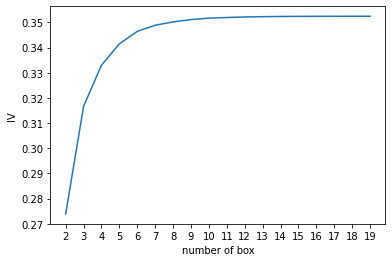

In [37]:
import matplotlib.pyplot as plt
import scipy
num_bins_ = num_bins.copy()
IV = []
axisx = []

while len(num_bins_) > 2:  # 大于设置的最低分箱个数
    pvs = []
    # 获取 num_bins_两两之间的卡方检验的置信度（或卡方值）
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        # 0 返回 chi2 值，1 返回 p 值。
        pv = scipy.stats.chi2_contingency([x1, x2])[1]  # p值
        # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]#计算卡方值
        pvs.append(pv)

    # 通过 p 值进行处理。合并 p 值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(
        num_bins_[i][0],
        num_bins_[i+1][1],
        num_bins_[i][2]+num_bins_[i+1][2],
        num_bins_[i][3]+num_bins_[i+1][3])]

    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))

plt.figure()
plt.plot(axisx, IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()
# 选择转折点处，也就是下坠最快的折线点，所以这里对于age来说选择箱数为6

### 用最佳分箱个数分箱，并验证分箱结果

In [38]:
def get_bin(num_bins_, n):
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1, x2])[1]
            # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(
            num_bins_[i][0],
            num_bins_[i+1][1],
            num_bins_[i][2]+num_bins_[i+1][2],
            num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_


afterbins = get_bin(num_bins, 6)

afterbins

[(21.0, 36.0, 14797, 24879),
 (36.0, 54.0, 39070, 51380),
 (54.0, 61.0, 15743, 12205),
 (61.0, 64.0, 6968, 3233),
 (64.0, 74.0, 13376, 4225),
 (74.0, 107.0, 7737, 1395)]

In [39]:
bins_df = get_woe(num_bins)

bins_df
# 希望每组的bad_rate相差越大越好；
# woe差异越大越好，应该具有单调性，随着箱的增加，要么由正到负，要么由负到正，只能有一个转折过程；
# 如果woe值大小变化是有两个转折，比如呈现w型，证明分箱过程有问题
# num_bins保留的信息越多越好

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,36.0,14797,24879,39676,0.203458,0.627054,0.151467,0.255649,-0.523435
1,36.0,54.0,39070,51380,90450,0.463827,0.568049,0.399934,0.527965,-0.277730
2,54.0,61.0,15743,12205,27948,0.143317,0.436704,0.161151,0.125415,0.250714
3,61.0,64.0,6968,3233,10201,0.052311,0.316930,0.071327,0.033221,0.764082
4,64.0,74.0,13376,4225,17601,0.090258,0.240043,0.136922,0.043415,1.148607
5,74.0,107.0,7737,1395,9132,0.046829,0.152760,0.079199,0.014335,1.709284


### 将选取最佳分箱个数的过程包装为函数

In [40]:
def graphforbestbin(DF, X, Y, n=5, q=20, graph=True):
    '''
    自动最优分箱函数，基于卡方检验的分箱

    参数：
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像

    区间为前开后闭 (]

    '''

    DF = DF[[X, Y]].copy()

#     DF["qcut"], bins = pd.qcut(DF[X], retbins=True, q=q, duplicates="drop")
#     coount_y0 = DF.loc[DF[Y] == 0].groupby(by="qcut").count()[Y]
#     coount_y1 = DF.loc[DF[Y] == 1].groupby(by="qcut").count()[Y]
#     num_bins = [*zip(bins, bins[1:], coount_y0, coount_y1)]

    coount_y0 = DF.loc[DF[Y] == 0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y] == 1].groupby(by="qcut").count()[Y]
    coount_good = pd.concat([coount_y0, coount_y1], axis=1).fillna(0)
    coount_good.columns = [f'{Y}0', f'{Y}1']
    num_bins = [*zip(bins, bins[1:], coount_good[f'{Y}0'], coount_good[f'{Y}1'])]
    

    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
            continue

        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break

    def get_woe(num_bins):
        columns = ["min", "max", "count_0", "count_1"]
        df = pd.DataFrame(num_bins, columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df

    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv

    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1, x2])[1]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3])]

        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))

    if graph:
        plt.figure()
        plt.plot(axisx, IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    if IV:
        return bins_df

### 对所有特征进行分箱选择

RevolvingUtilizationOfUnsecuredLines


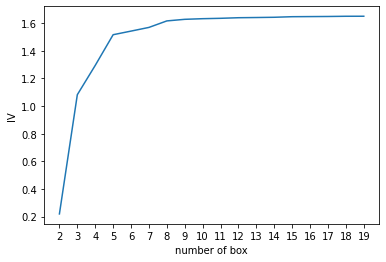

age


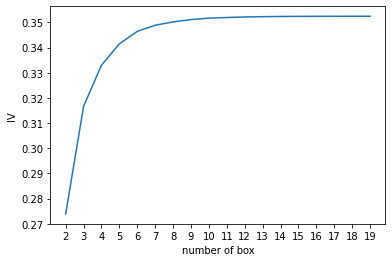

NumberOfTime30-59DaysPastDueNotWorse


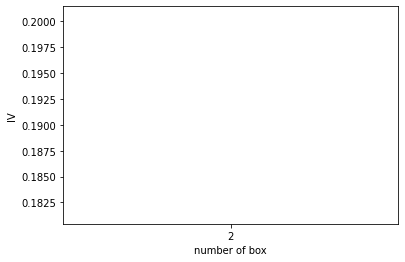

DebtRatio


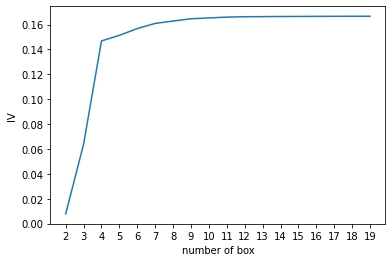

MonthlyIncome


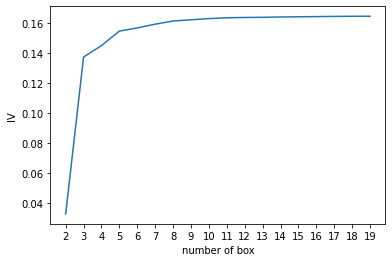

NumberOfOpenCreditLinesAndLoans


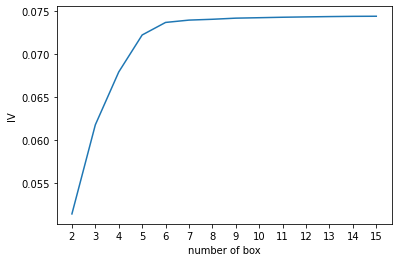

NumberOfTimes90DaysLate


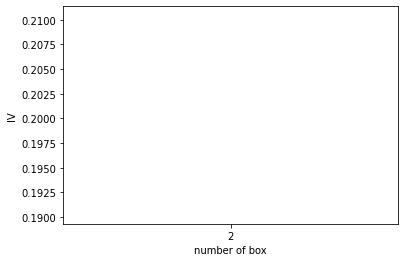

NumberRealEstateLoansOrLines


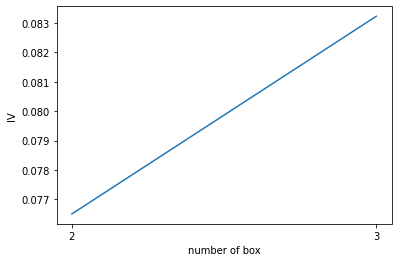

NumberOfTime60-89DaysPastDueNotWorse


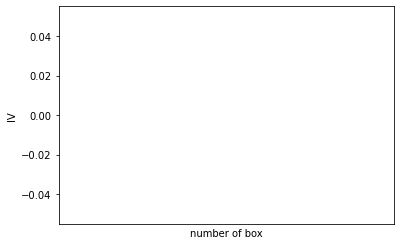

NumberOfDependents


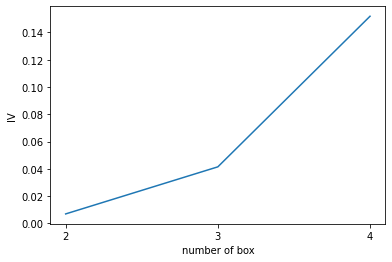

In [41]:
model_data.columns

for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data, i, "SeriousDlqin2yrs", n=2, q=20)

我们发现，不是所有的特征都可以使用这个分箱函数，比如说有的特征，像家人数量，就无法分出20组。于是我们 将可以分箱的特征放出来单独分组，不能自动分箱的变量自己观察然后手写：

In [42]:
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines": 6,
                 "age": 5,
                 "DebtRatio": 4,
                 "MonthlyIncome": 3,
                 "NumberOfOpenCreditLinesAndLoans": 5}

# 不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse": [0, 1, 2, 13],
             "NumberOfTimes90DaysLate": [0, 1, 2, 17],
             "NumberRealEstateLoansOrLines": [0, 1, 2, 4, 54],
             "NumberOfTime60-89DaysPastDueNotWorse": [0, 1, 2, 8],
             "NumberOfDependents": [0, 1, 2, 3]}

# 保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值
# 原因：比如一些新的值出现，例如家庭人数为30，以前没出现过，改成范围为极大值之后，这些新值就都能分到箱里边了
hand_bins = {k: [-np.inf, *v[:-1], np.inf] for k, v in hand_bins.items()}

In [43]:
hand_bins

{'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [44]:
bins_of_col = {}

# 生成自动分箱的分箱区间和分箱后的 IV 值
for col in auto_col_bins:
    bins_df = graphforbestbin(
        model_data,
        col,
        "SeriousDlqin2yrs",  # 使用字典的性质来取出每个特征所对应的箱的数量
        n=auto_col_bins[col],
        q=20,
        graph=False
    )
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    # 保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0], bins_list[-1] = -np.inf, np.inf
    bins_of_col[col] = bins_list
# 合并手动分箱数据    
bins_of_col.update(hand_bins)

bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.09904007637028829,
  0.29811658382144207,
  0.4656987825,
  0.982765973368248,
  0.9999998999999999,
  inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.01732823075,
  0.4015737659955885,
  1.4668188007857594,
  inf],
 'MonthlyIncome': [-inf, 0.1, 6900.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

## 计算各箱的WOE并映射到数据中

In [45]:
data = model_data.copy()

# 函数pd.cut，可以根据已知的分箱间隔把数据分箱
# 参数为 pd.cut(数据，以列表表示的分箱间隔)
data = data[["age", "SeriousDlqin2yrs"]].copy()

data["cut"] = pd.cut(data["age"], [-np.inf, 36.0, 54.0, 61.0, 74.0, np.inf])

data.head()

,age,SeriousDlqin2yrs,cut
0,53,0,"(36.0, 54.0]"
1,63,0,"(61.0, 74.0]"
2,39,1,"(36.0, 54.0]"
3,73,0,"(61.0, 74.0]"
4,53,1,"(36.0, 54.0]"


In [46]:
# 将数据按分箱结果聚合，并取出其中的标签值
data.groupby("cut")["SeriousDlqin2yrs"].value_counts()

cut           SeriousDlqin2yrs
(-inf, 36.0]  1                   24879
              0                   14797
(36.0, 54.0]  1                   51380
              0                   39070
(54.0, 61.0]  0                   15743
              1                   12205
(61.0, 74.0]  0                   20344
              1                    7458
(74.0, inf]   0                    7737
              1                    1395
Name: SeriousDlqin2yrs, dtype: int64

In [47]:
# 使用unstack()来将树状结构变成表状结构
data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()

SeriousDlqin2yrs,0,1
cut,,
"(-inf, 36.0]",14797,24879
"(36.0, 54.0]",39070,51380
"(54.0, 61.0]",15743,12205
"(61.0, 74.0]",20344,7458
"(74.0, inf]",7737,1395


In [48]:
bins_df = data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()

bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum()) /
                        (bins_df[1]/bins_df[1].sum()))

bins_df

SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 36.0]",14797,24879,-0.523435
"(36.0, 54.0]",39070,51380,-0.277730
"(54.0, 61.0]",15743,12205,0.250714
"(61.0, 74.0]",20344,7458,0.999663
"(74.0, inf]",7737,1395,1.709284


In [49]:
def get_woe(df, col, y, bins):
    df = df[[col, y]].copy()
    df["cut"] = pd.cut(df[col], bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log(
        (bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe


# 将所有特征的WOE存储到字典当中
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(
        model_data, col, "SeriousDlqin2yrs", bins_of_col[col])

woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.099]     2.201208
 (0.099, 0.298]    0.671111
 (0.298, 0.466]   -0.124900
 (0.466, 0.983]   -1.074512
 (0.983, 1.0]     -0.465548
 (1.0, inf]       -2.049135
 dtype: float64,
 'age': cut
 (-inf, 36.0]   -0.523435
 (36.0, 54.0]   -0.277730
 (54.0, 61.0]    0.250714
 (61.0, 74.0]    0.999663
 (74.0, inf]     1.709284
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.0173]     1.501558
 (0.0173, 0.402]    0.036624
 (0.402, 1.467]    -0.388461
 (1.467, inf]       0.176333
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 0.1]      1.390312
 (0.1, 6900.0]   -0.199553
 (6900.0, inf]    0.316607
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.849111
 (1.0, 3.0]    -0.329747
 (3.0, 5.0]    -0.055973
 (5.0, 17.0]    0.124327
 (17.0, inf]    0.466058
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.353624
 (0.0, 1.0]    -0.871595
 (1.0, 2.0]    -1.381058
 (2.0, inf]    -1.550444
 dtype: float

In [50]:
# 不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
model_woe = pd.DataFrame(index=model_data.index)

# 将原数据分箱后，按箱的结果把WOE结构用map函数映射到数据中
model_woe["age"] = pd.cut(
    model_data["age"], bins_of_col["age"]).map(woeall["age"])
model_woe.head()

,age
0,-0.277730
1,0.999663
2,-0.277730
3,0.999663
4,-0.277730


In [51]:
# 对所有特征操作可以写成：
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col], bins_of_col[col]).map(woeall[col])

# 将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]

# 这就是我们的建模数据了
model_woe.head()

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.277730,2.201208,0.036624,-0.199553,-0.055973,0.353624,0.236279,-0.392475,0.125247,0.627954,0
1,0.999663,0.671111,0.036624,-0.199553,-0.055973,0.353624,0.236279,-0.392475,0.125247,0.627954,0
2,-0.277730,-2.049135,-0.388461,-0.199553,-0.055973,-0.871595,-1.761665,-0.392475,-1.758766,-0.472626,1
3,0.999663,2.201208,-0.388461,-0.199553,0.124327,0.353624,0.236279,0.618487,0.125247,0.627954,0
4,-0.277730,-1.074512,-0.388461,0.316607,0.124327,0.353624,0.236279,0.618487,0.125247,-0.583830,1


In [52]:
# 处理测试集
vali_woe = pd.DataFrame(index=vali_data.index)

for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col], bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]

vali_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,2.201208,0.250714,1.501558,-0.199553,-0.055973,0.353624,0.236279,-0.392475,0.125247,0.627954,0
1,-1.074512,-0.277730,0.036624,0.316607,0.124327,0.353624,0.236279,0.618487,0.125247,-0.472626,1
2,2.201208,0.999663,0.036624,-0.199553,-0.055973,0.353624,0.236279,-0.392475,0.125247,0.627954,0
3,2.201208,-0.277730,0.036624,-0.199553,0.124327,0.353624,0.236279,0.191105,0.125247,0.627954,0
4,-1.074512,-0.277730,0.036624,-0.199553,0.124327,0.353624,0.236279,-0.392475,0.125247,-0.583830,1


## 建模与模型验证

In [60]:
X = model_woe.iloc[:, :-1]
y = model_woe.iloc[:, -1]

vali_X = vali_woe.iloc[:, :-1]
vali_y = vali_woe.iloc[:, -1]

In [61]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR().fit(X, y)
lr.score(vali_X, vali_y)

0.7745046424810951

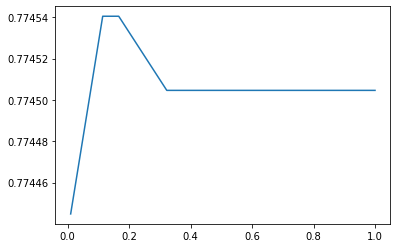

array([5], dtype=int32)

In [55]:
c_1 = np.linspace(0.01, 1, 20)
c_2 = np.linspace(0.01, 0.2, 20)

score = []
for i in c_1:
    lr = LR(solver='liblinear', C=i).fit(X, y)
    score.append(lr.score(vali_X, vali_y))
plt.figure()
plt.plot(c_1, score)
plt.show()
lr.n_iter_  # array([5], dtype=int32)

/Users/cool/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/cool/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/cool/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/cool/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/cool/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/svm/_b

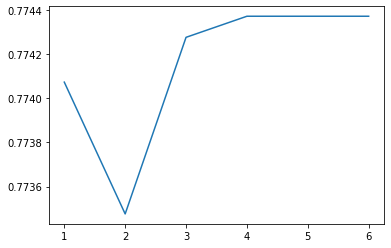

In [56]:
score = []
for i in [1, 2, 3, 4, 5, 6]:
    lr = LR(solver='liblinear', C=0.025, max_iter=i).fit(X, y)
    score.append(lr.score(vali_X, vali_y))
plt.figure()
plt.plot([1, 2, 3, 4, 5, 6], score)
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

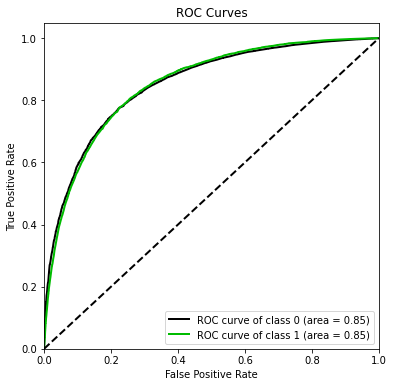

In [57]:
import scikitplot as skplt

# %%cmd
# pip install scikit-plot

vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                       plot_micro=False, figsize=(6, 6),
                       plot_macro=False)

## 制作评分卡

In [62]:
B = 20/np.log(2)
A = 600 + B*np.log(1/60)

B, A

(28.85390081777927, 481.8621880878296)

In [63]:
base_score = A - B*lr.intercept_  # lr.intercept_：截距
base_score  # array([481.56390143])

array([481.99428596])

In [64]:
lr.intercept_

array([-0.00457816])

In [65]:
score_age = woeall["age"] * (-B*lr.coef_[0][1])  # lr.coef_：每一个特征建模之后得出的系数
score_age  # "age"特征中每个箱对应的分数

cut
(-inf, 36.0]   -11.333885
(36.0, 54.0]    -6.013652
(54.0, 61.0]     5.428689
(61.0, 74.0]    21.645587
(74.0, inf]     37.010924
dtype: float64

In [69]:
file = "./ScoreData.csv"

# open是用来打开文件的python命令，第一个参数是文件的路径+文件名，如果你的文件是放在根目录下，则你只需要文件名就好
# 第二个参数是打开文件后的用途，"w"表示用于写入，通常使用的是"r"，表示打开来阅读
# 首先写入基准分数
# 之后使用循环，每次生成一组score_age类似的分档和分数，不断写入文件之中

with open(file, "w") as fdata:
    fdata.write("base_score,{}\n".format(base_score[0]))
for i, col in enumerate(X.columns):  # [*enumerate(X.columns)]
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file, header=True, mode="a")

In [68]:
pd.DataFrame(score)

,Score
NumberOfDependents,
"(-inf, 0.0]",14.613655
"(0.0, 1.0]",-13.586814
"(1.0, 2.0]",-12.311041
"(2.0, inf]",-10.998890
